#📌 Extracão

In [3]:
import pandas as pd
import requests

# URL para o arquivo JSON bruto
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"

try:
    # Faz a requisição para a URL
    response = requests.get(url)
    response.raise_for_status() # Garante que a requisição foi bem-sucedida

    # Converte a resposta JSON para um DataFrame
    df = pd.json_normalize(response.json())

    # Salva o DataFrame para uso futuro
    df.to_csv('telecom_data.csv', index=False)

    print("DataFrame criado e salvo com sucesso!")
    print(df.head())

except requests.exceptions.RequestException as e:
    print(f"Erro de rede ao tentar acessar a API: {e}")
except Exception as e:
    print(f"Ocorreu um erro inesperado: {e}")

DataFrame criado e salvo com sucesso!
   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  N

#🔧 Transformação

In [4]:
# Link para consulta manual do Dicionário de Dados, conforme solicitado:
# https://github.com/ingridcristh/challenge2-data-science/blob/main/TelecomX_dicionario.md

# 1. Obter um resumo completo do DataFrame
# - Lista de colunas
# - Contagem de valores não-nulos (para identificar dados faltantes)
# - Tipos de dados de cada coluna (Dtype)
print("--- Informações Gerais do DataFrame (colunas, nulos, tipos) ---")
df.info()

print("\n" + "="*60 + "\n")

--- Informações Gerais do DataFrame (colunas, nulos, tipos) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null

In [5]:
# 2. Visualizar as 5 primeiras linhas do DataFrame
# - Ajuda a entender o formato e os valores contidos em cada coluna
print("--- Amostra dos Dados (5 primeiras linhas) ---")
print(df.head())

print("\n" + "="*60 + "\n")

--- Amostra dos Dados (5 primeiras linhas) ---
   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes          

In [6]:
# 3. Obter uma lista apenas com os nomes das colunas
print("--- Nomes de Todas as Colunas ---")
print(df.columns.to_list())

--- Nomes de Todas as Colunas ---
['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total']


In [8]:

# IDENTIFICAÇÃO E SELEÇÃO DAS COLUNAS RELEVANTES


# Com base na análise da etapa anterior, vamos agora "identificar" as colunas
# criando listas em Python para cada grupo de relevância.

# Nível 1: Altamente Relevantes (Impacto Direto)
colunas_altamente_relevantes = [
    'Churn',
    'Contract',
    'tenure',
    'MonthlyCharges',
    'InternetService'
]

# Nível 2: Contexto Importante (Experiência do Cliente)
colunas_contexto_importante = [
    'TechSupport',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'PaymentMethod',
    'TotalCharges'
]

# Nível 3: Demográficas (Segmentação)
colunas_demograficas = [
    'gender',
    'SeniorCitizen',
    'Partner',
    'Dependents'
]

# Apenas para confirmação, vamos imprimir as listas criadas.
print("--- Colunas Identificadas por Nível de Relevância ---")
print("\n[NÍVEL 1 - ALTAMENTE RELEVANTES]:")
print(colunas_altamente_relevantes)

print("\n[NÍVEL 2 - CONTEXTO IMPORTANTE]:")
print(colunas_contexto_importante)

print("\n[NÍVEL 3 - DEMOGRÁFICAS]:")
print(colunas_demograficas)

print("\n\nIdentificação concluída!")

--- Colunas Identificadas por Nível de Relevância ---

[NÍVEL 1 - ALTAMENTE RELEVANTES]:
['Churn', 'Contract', 'tenure', 'MonthlyCharges', 'InternetService']

[NÍVEL 2 - CONTEXTO IMPORTANTE]:
['TechSupport', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'PaymentMethod', 'TotalCharges']

[NÍVEL 3 - DEMOGRÁFICAS]:
['gender', 'SeniorCitizen', 'Partner', 'Dependents']


Identificação concluída!


In [13]:
# VERIFICAÇÃO DE ERROS DE FORMATAÇÃO E VALORES AUSENTES

print("--- Etapa 1: Análise da coluna 'account.Charges.Total' ---")
# Primeiro, vamos confirmar o tipo de dado original.
print(f"Tipo de dado original: {df['account.Charges.Total'].dtype}")

# Forçamos a conversão para numérico.
# A função 'pd.to_numeric' com 'errors='coerce'' transforma qualquer valor
# que não seja um número (como " ") em NaN (Not a Number).
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

print(f"Tipo de dado após conversão: {df['account.Charges.Total'].dtype}")

# Agora que os erros de formatação viraram NaN, podemos verificar a contagem real de valores ausentes.
print("\n--- Contagem de valores ausentes por coluna (após correção de formato) ---")
print(df.isnull().sum())

--- Etapa 1: Análise da coluna 'account.Charges.Total' ---
Tipo de dado original: float64
Tipo de dado após conversão: float64

--- Contagem de valores ausentes por coluna (após correção de formato) ---
customerID                    0
Churn                         0
customer.gender               0
customer.SeniorCitizen        0
customer.Partner              0
customer.Dependents           0
customer.tenure               0
phone.PhoneService            0
phone.MultipleLines           0
internet.InternetService      0
internet.OnlineSecurity       0
internet.OnlineBackup         0
internet.DeviceProtection     0
internet.TechSupport          0
internet.StreamingTV          0
internet.StreamingMovies      0
account.Contract              0
account.PaperlessBilling      0
account.PaymentMethod         0
account.Charges.Monthly       0
account.Charges.Total        11
dtype: int64


In [14]:
# VERIFICAÇÃO DE LINHAS DUPLICADAS

# O comando 'df.duplicated().sum()' conta quantas linhas são cópias exatas de outras.
quantidade_duplicadas = df.duplicated().sum()

print("--- Etapa 2: Verificação de duplicatas ---")
print(f"Foram encontradas {quantidade_duplicadas} linhas duplicadas no dataset.")

--- Etapa 2: Verificação de duplicatas ---
Foram encontradas 0 linhas duplicadas no dataset.


In [15]:
# VERIFICAÇÃO DE INCONSISTÊNCIAS EM COLUNAS CATEGÓRICAS

print("--- Etapa 3: Verificação dos valores únicos em colunas de texto ---")

# Selecionamos automaticamente todas as colunas do tipo 'object' (texto).
colunas_categoricas = df.select_dtypes(include=['object']).columns

for coluna in colunas_categoricas:
    # Ignoramos a coluna de ID, pois ela é única para cada cliente.
    if 'customerID' not in coluna:
        valores_unicos = df[coluna].unique()
        print(f"  - Coluna '{coluna}': {valores_unicos}")

print("\nVerificação de categorias concluída.")

--- Etapa 3: Verificação dos valores únicos em colunas de texto ---
  - Coluna 'Churn': ['No' 'Yes' '']
  - Coluna 'customer.gender': ['Female' 'Male']
  - Coluna 'customer.Partner': ['Yes' 'No']
  - Coluna 'customer.Dependents': ['Yes' 'No']
  - Coluna 'phone.PhoneService': ['Yes' 'No']
  - Coluna 'phone.MultipleLines': ['No' 'Yes' 'No phone service']
  - Coluna 'internet.InternetService': ['DSL' 'Fiber optic' 'No']
  - Coluna 'internet.OnlineSecurity': ['No' 'Yes' 'No internet service']
  - Coluna 'internet.OnlineBackup': ['Yes' 'No' 'No internet service']
  - Coluna 'internet.DeviceProtection': ['No' 'Yes' 'No internet service']
  - Coluna 'internet.TechSupport': ['Yes' 'No' 'No internet service']
  - Coluna 'internet.StreamingTV': ['Yes' 'No' 'No internet service']
  - Coluna 'internet.StreamingMovies': ['No' 'Yes' 'No internet service']
  - Coluna 'account.Contract': ['One year' 'Month-to-month' 'Two year']
  - Coluna 'account.PaperlessBilling': ['Yes' 'No']
  - Coluna 'account.Pa

In [16]:
#TRATAMENTO DE VALORES AUSENTES

# Para confirmar nossa hipótese, vamos visualizar as linhas onde 'account.Charges.Total' é nulo.
print("--- Clientes com 'account.Charges.Total' ausente ---")
print(df[df['account.Charges.Total'].isnull()][['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']])

# A hipótese se confirma: são clientes com tenure = 0.
# A estratégia correta é preencher o valor total gasto com 0, pois eles ainda não tiveram um ciclo de faturamento completo.
df['account.Charges.Total'].fillna(0, inplace=True)

print("\nValores ausentes em 'account.Charges.Total' preenchidos com 0.")

# Verificação final para garantir que não há mais valores ausentes na coluna
print("\nContagem de valores ausentes após o tratamento:")
print(df['account.Charges.Total'].isnull().sum())

--- Clientes com 'account.Charges.Total' ausente ---
      customer.tenure  account.Charges.Monthly  account.Charges.Total
975                 0                    56.05                    NaN
1775                0                    20.00                    NaN
1955                0                    61.90                    NaN
2075                0                    19.70                    NaN
2232                0                    20.25                    NaN
2308                0                    25.35                    NaN
2930                0                    73.35                    NaN
3134                0                    25.75                    NaN
3203                0                    52.55                    NaN
4169                0                    80.85                    NaN
5599                0                    19.85                    NaN

Valores ausentes em 'account.Charges.Total' preenchidos com 0.

Contagem de valores ausentes após o tratam

/tmp/ipython-input-1998749035.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['account.Charges.Total'].fillna(0, inplace=True)


In [17]:
# REMOÇÃO DE LINHAS DUPLICADAS

# Primeiro, vamos verificar a quantidade de linhas no DataFrame ANTES da remoção
print(f"Quantidade de linhas ANTES de remover duplicatas: {len(df)}")

# O comando 'drop_duplicates' remove as linhas que são cópias exatas.
# 'inplace=True' aplica a modificação diretamente no nosso DataFrame 'df'.
df.drop_duplicates(inplace=True)

# Verificamos a quantidade de linhas DEPOIS da remoção
print(f"Quantidade de linhas APÓS remover duplicatas: {len(df)}")

Quantidade de linhas ANTES de remover duplicatas: 7267
Quantidade de linhas APÓS remover duplicatas: 7267


In [18]:
# VERIFICAÇÃO FINAL PÓS-LIMPEZA

print("--- Verificação Final da Qualidade dos Dados ---")

# 1. Checar se ainda existe algum valor nulo no DataFrame inteiro
total_nulos = df.isnull().sum().sum()
print(f"\nTotal de valores nulos no DataFrame: {total_nulos}")

# 2. Usar o .info() para uma última revisão dos tipos de dados e contagens
print("\nResumo final do DataFrame:")
df.info()

print("\nLimpeza de dados concluída! O DataFrame está pronto para a análise exploratória.")

--- Verificação Final da Qualidade dos Dados ---

Total de valores nulos no DataFrame: 0

Resumo final do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   

In [19]:
# ENGENHARIA DE ATRIBUTOS - CRIAÇÃO DA COLUNA 'Contas_Diarias'

# Vamos criar a coluna 'Contas_Diarias' dividindo a cobrança mensal por 30.
# Usaremos .round(2) para arredondar o resultado para duas casas decimais,
# o que é apropriado para valores monetários.
df['Contas_Diarias'] = (df['account.Charges.Monthly'] / 30).round(2)

print("Coluna 'Contas_Diarias' criada com sucesso.")

# Para verificar o resultado, vamos exibir a nova coluna ao lado da original
# nas primeiras 5 linhas do DataFrame.
print("\nAmostra dos resultados:")
print(df[['customerID', 'account.Charges.Monthly', 'Contas_Diarias']].head())

# Vamos também verificar as informações do DataFrame para confirmar a adição da nova coluna.
print("\nInformações do DataFrame atualizadas:")
df.info()

Coluna 'Contas_Diarias' criada com sucesso.

Amostra dos resultados:
   customerID  account.Charges.Monthly  Contas_Diarias
0  0002-ORFBO                     65.6            2.19
1  0003-MKNFE                     59.9            2.00
2  0004-TLHLJ                     73.9            2.46
3  0011-IGKFF                     98.0            3.27
4  0013-EXCHZ                     83.9            2.80

Informações do DataFrame atualizadas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   cu

#📊 Carga e análise

In [20]:
# ANÁLISE DESCRITIVA - COLUNAS NUMÉRICAS

print("--- Estatísticas Descritivas das Colunas Numéricas ---")

# O método .describe() calcula automaticamente:
# count: contagem de valores
# mean: média
# std: desvio padrão (standard deviation)
# min: valor mínimo
# 25%: primeiro quartil (Q1)
# 50%: mediana (Q2)
# 75%: terceiro quartil (Q3)
# max: valor máximo
df.describe()

--- Estatísticas Descritivas das Colunas Numéricas ---


,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,Contas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098,2277.182035,2.157292
std,0.369074,24.571773,30.129572,2268.648587,1.004407
min,0.000000,0.000000,18.250000,0.000000,0.610000
25%,0.000000,9.000000,35.425000,396.200000,1.180000
50%,0.000000,29.000000,70.300000,1389.200000,2.340000
75%,0.000000,55.000000,89.875000,3778.525000,2.995000
max,1.000000,72.000000,118.750000,8684.800000,3.960000


In [21]:
# ANÁLISE DESCRITIVA - COLUNAS CATEGÓRICAS

print("--- Estatísticas Descritivas das Colunas Categóricas (Texto) ---")

# Usamos .describe(include=['object']) para focar nas colunas de texto.
# count: contagem de valores
# unique: quantidade de categorias únicas
# top: a categoria mais frequente
# freq: a frequência (contagem) da categoria mais comum
df.describe(include=['object'])

--- Estatísticas Descritivas das Colunas Categóricas (Texto) ---


,customerID,Churn,customer.gender,customer.Partner,customer.Dependents,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod
count,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267
unique,7267,3,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,9995-HOTOH,No,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,1,5174,3675,3749,5086,6560,3495,3198,3608,3182,3195,3582,2896,2870,4005,4311,2445


In [22]:
# ANÁLISE DESCRITIVA - FOCO NA VARIÁVEL 'Churn'

print("--- Distribuição da Variável Alvo (Churn) ---")

# Usamos .value_counts() para contar as ocorrências de cada categoria.
print("\nContagem absoluta:")
print(df['Churn'].value_counts())

# Usar 'normalize=True' nos dá a mesma informação em porcentagem, que é mais fácil de interpretar.
print("\nDistribuição percentual:")
churn_percentual = df['Churn'].value_counts(normalize=True) * 100
print(churn_percentual)

--- Distribuição da Variável Alvo (Churn) ---

Contagem absoluta:
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

Distribuição percentual:
Churn
No     71.198569
Yes    25.719004
        3.082427
Name: proportion, dtype: float64


/tmp/ipython-input-3238496957.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=df, palette=['#5cb85c', '#d9534f'], order=['No', 'Yes'])


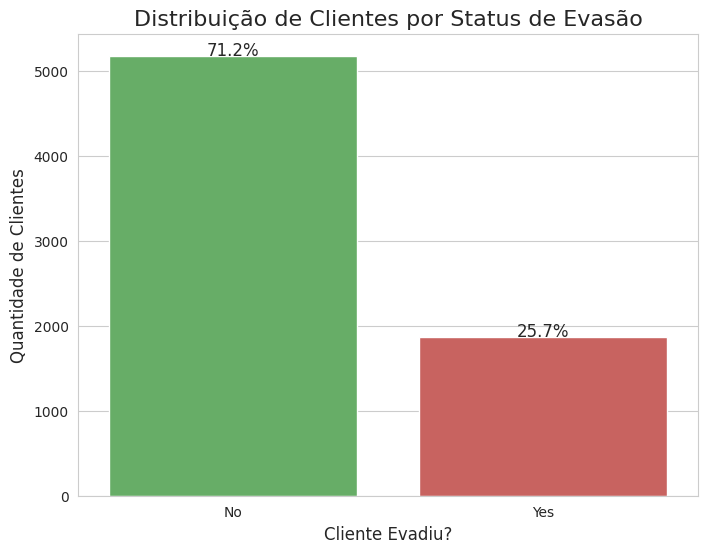

In [23]:
# GRÁFICO - DISTRIBUIÇÃO DA EVASÃO (CHURN)

import matplotlib.pyplot as plt
import seaborn as sns

# Definindo um estilo mais agradável para os gráficos
sns.set_style("whitegrid")

# Criando a figura e os eixos para o nosso gráfico
plt.figure(figsize=(8, 6))

# Criando o gráfico de contagem (countplot)
# O Seaborn conta automaticamente as ocorrências de cada categoria na coluna 'Churn'
ax = sns.countplot(x='Churn', data=df, palette=['#5cb85c', '#d9534f'], order=['No', 'Yes'])

# Adicionando um título ao gráfico
ax.set_title('Distribuição de Clientes por Status de Evasão', fontsize=16)
ax.set_xlabel('Cliente Evadiu?', fontsize=12)
ax.set_ylabel('Quantidade de Clientes', fontsize=12)

# --- Adicionando os rótulos de porcentagem em cima de cada barra ---
total = len(df) # Total de clientes para calcular a porcentagem
for p in ax.patches:
    height = p.get_height() # Altura de cada barra
    ax.text(p.get_x() + p.get_width() / 2.,   # Posição x do texto
            height + 3,                      # Posição y do texto
            f'{100 * height / total:.1f}%',   # O texto da porcentagem
            ha="center", fontsize=12)

# Salva a imagem do gráfico para o seu ambiente Colab
plt.savefig('grafico_distribuicao_churn.png')

# Exibe o gráfico (o Colab exibe automaticamente, mas plt.show() é o comando explícito)
plt.show()

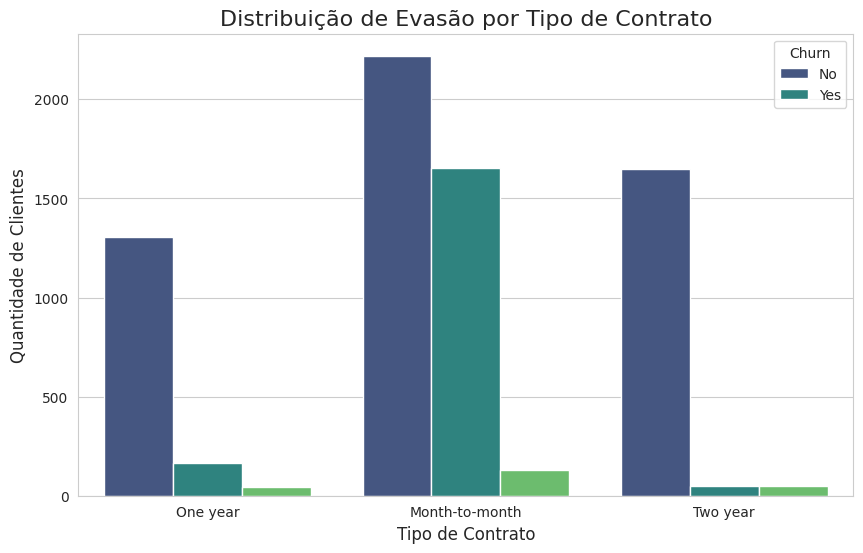

In [24]:
#ANÁLISE DE CHURN POR TIPO DE CONTRATO

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Usamos o parâmetro 'hue="Churn"' para que o Seaborn crie barras separadas
# para clientes 'Yes' e 'No' dentro de cada tipo de contrato.
ax = sns.countplot(x='account.Contract', hue='Churn', data=df, palette="viridis")

ax.set_title('Distribuição de Evasão por Tipo de Contrato', fontsize=16)
ax.set_xlabel('Tipo de Contrato', fontsize=12)
ax.set_ylabel('Quantidade de Clientes', fontsize=12)

plt.savefig('grafico_churn_por_contrato.png')
plt.show()

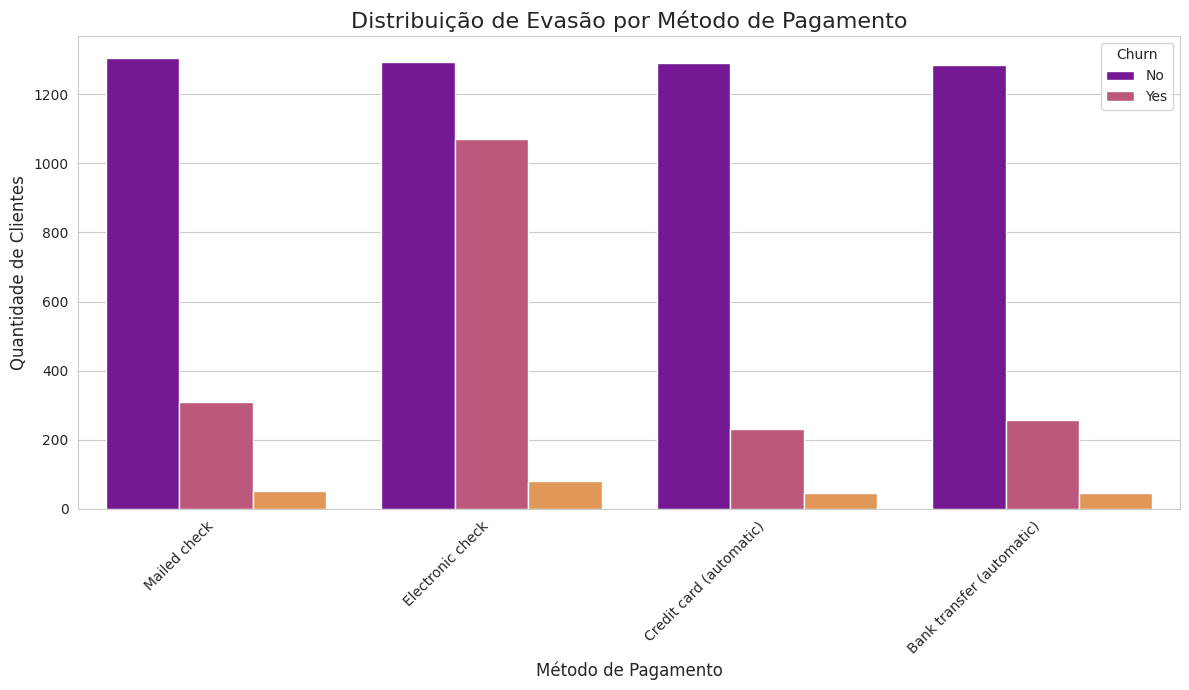

In [25]:
#ANÁLISE DE CHURN POR MÉTODO DE PAGAMENTO

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
# Aumentamos o tamanho do gráfico para que os nomes dos métodos de pagamento não se sobreponham
plt.figure(figsize=(12, 7))

ax = sns.countplot(x='account.PaymentMethod', hue='Churn', data=df, palette="plasma")

ax.set_title('Distribuição de Evasão por Método de Pagamento', fontsize=16)
ax.set_xlabel('Método de Pagamento', fontsize=12)
ax.set_ylabel('Quantidade de Clientes', fontsize=12)

# Rotaciona os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45, ha='right')
plt.tight_layout() # Ajusta o layout para evitar que os rótulos sejam cortados

plt.savefig('grafico_churn_por_pagamento.png')
plt.show()

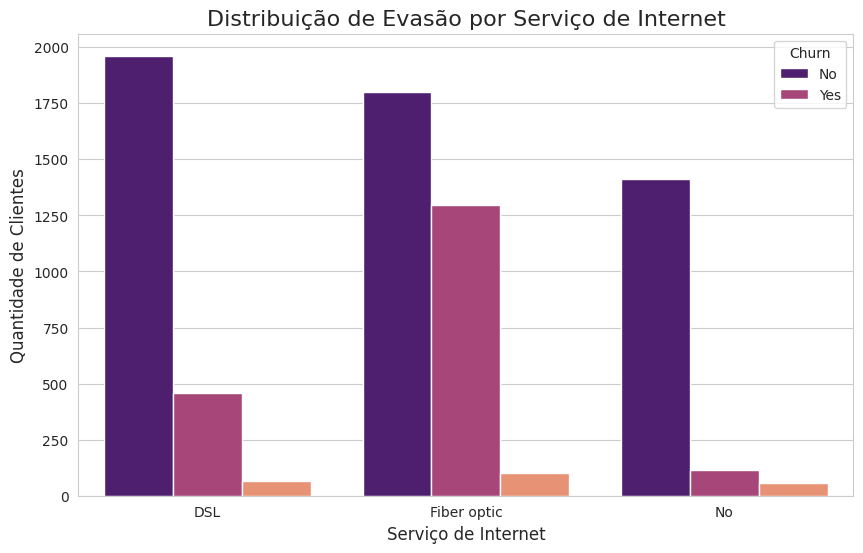

In [26]:
# ANÁLISE DE CHURN POR TIPO DE SERVIÇO DE INTERNET

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

ax = sns.countplot(x='internet.InternetService', hue='Churn', data=df, palette="magma")

ax.set_title('Distribuição de Evasão por Serviço de Internet', fontsize=16)
ax.set_xlabel('Serviço de Internet', fontsize=12)
ax.set_ylabel('Quantidade de Clientes', fontsize=12)

plt.savefig('grafico_churn_por_internet.png')
plt.show()

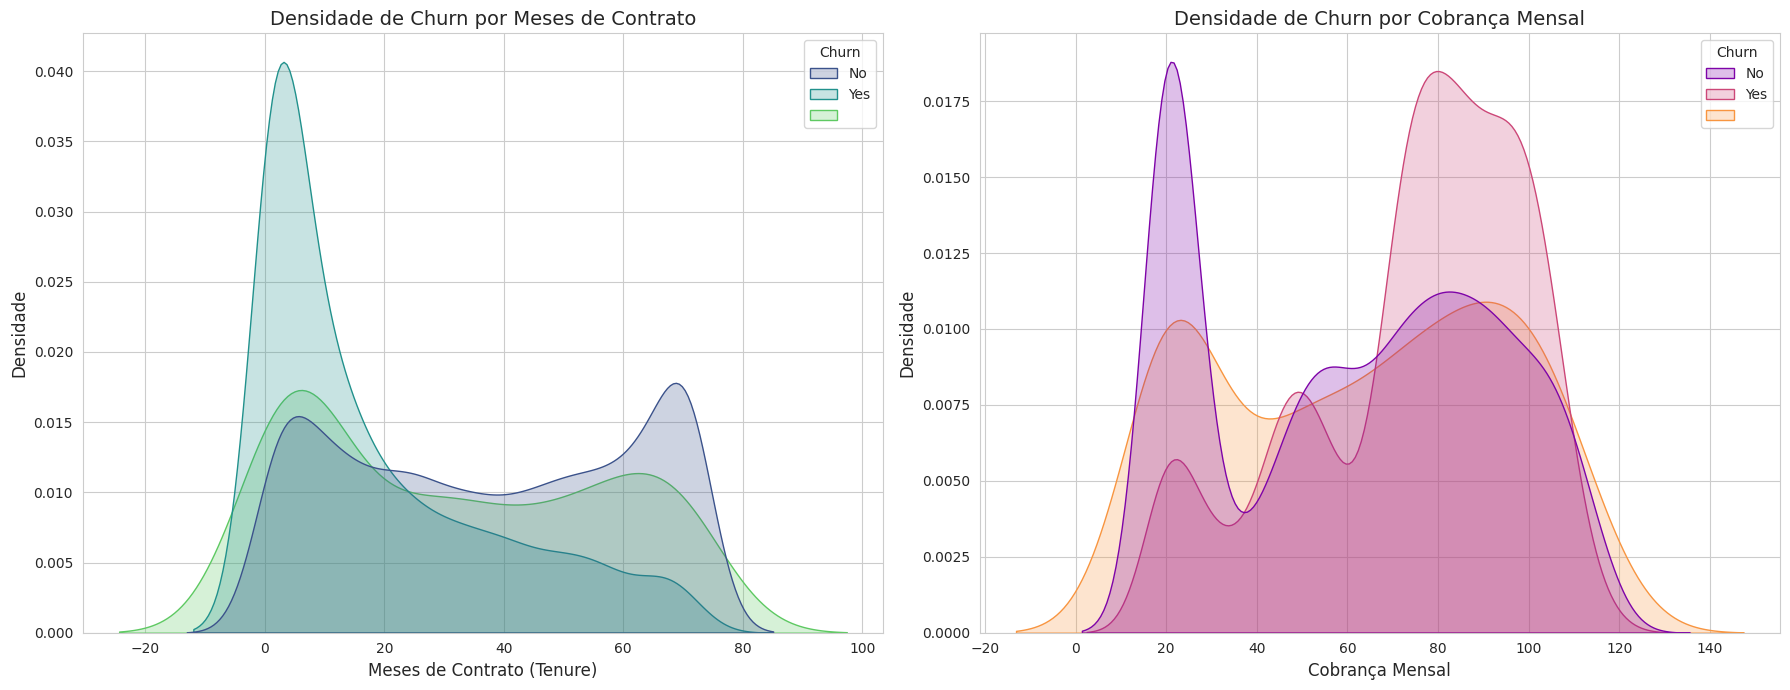

In [27]:
# ANÁLISE DE CHURN POR VARIÁVEIS NUMÉRICAS (DENSIDADE)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Criamos uma figura com dois subplots (um ao lado do outro)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 7))

# Gráfico 1: Análise por Tempo de Contrato (tenure)
sns.kdeplot(data=df, x='customer.tenure', hue='Churn', fill=True,
            common_norm=False, palette="viridis", ax=axes[0])
axes[0].set_title('Densidade de Churn por Meses de Contrato', fontsize=14)
axes[0].set_xlabel('Meses de Contrato (Tenure)', fontsize=12)
axes[0].set_ylabel('Densidade', fontsize=12)

# Gráfico 2: Análise por Cobrança Mensal
sns.kdeplot(data=df, x='account.Charges.Monthly', hue='Churn', fill=True,
            common_norm=False, palette="plasma", ax=axes[1])
axes[1].set_title('Densidade de Churn por Cobrança Mensal', fontsize=14)
axes[1].set_xlabel('Cobrança Mensal', fontsize=12)
axes[1].set_ylabel('Densidade', fontsize=12)

plt.tight_layout()
plt.savefig('grafico_densidade_churn_numericas.png')
plt.show()

/tmp/ipython-input-4033268160.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=coluna, data=df, palette="magma", ax=axes[i])
/tmp/ipython-input-4033268160.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=coluna, data=df, palette="magma", ax=axes[i])
/tmp/ipython-input-4033268160.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=coluna, data=df, palette="magma", ax=axes[i])


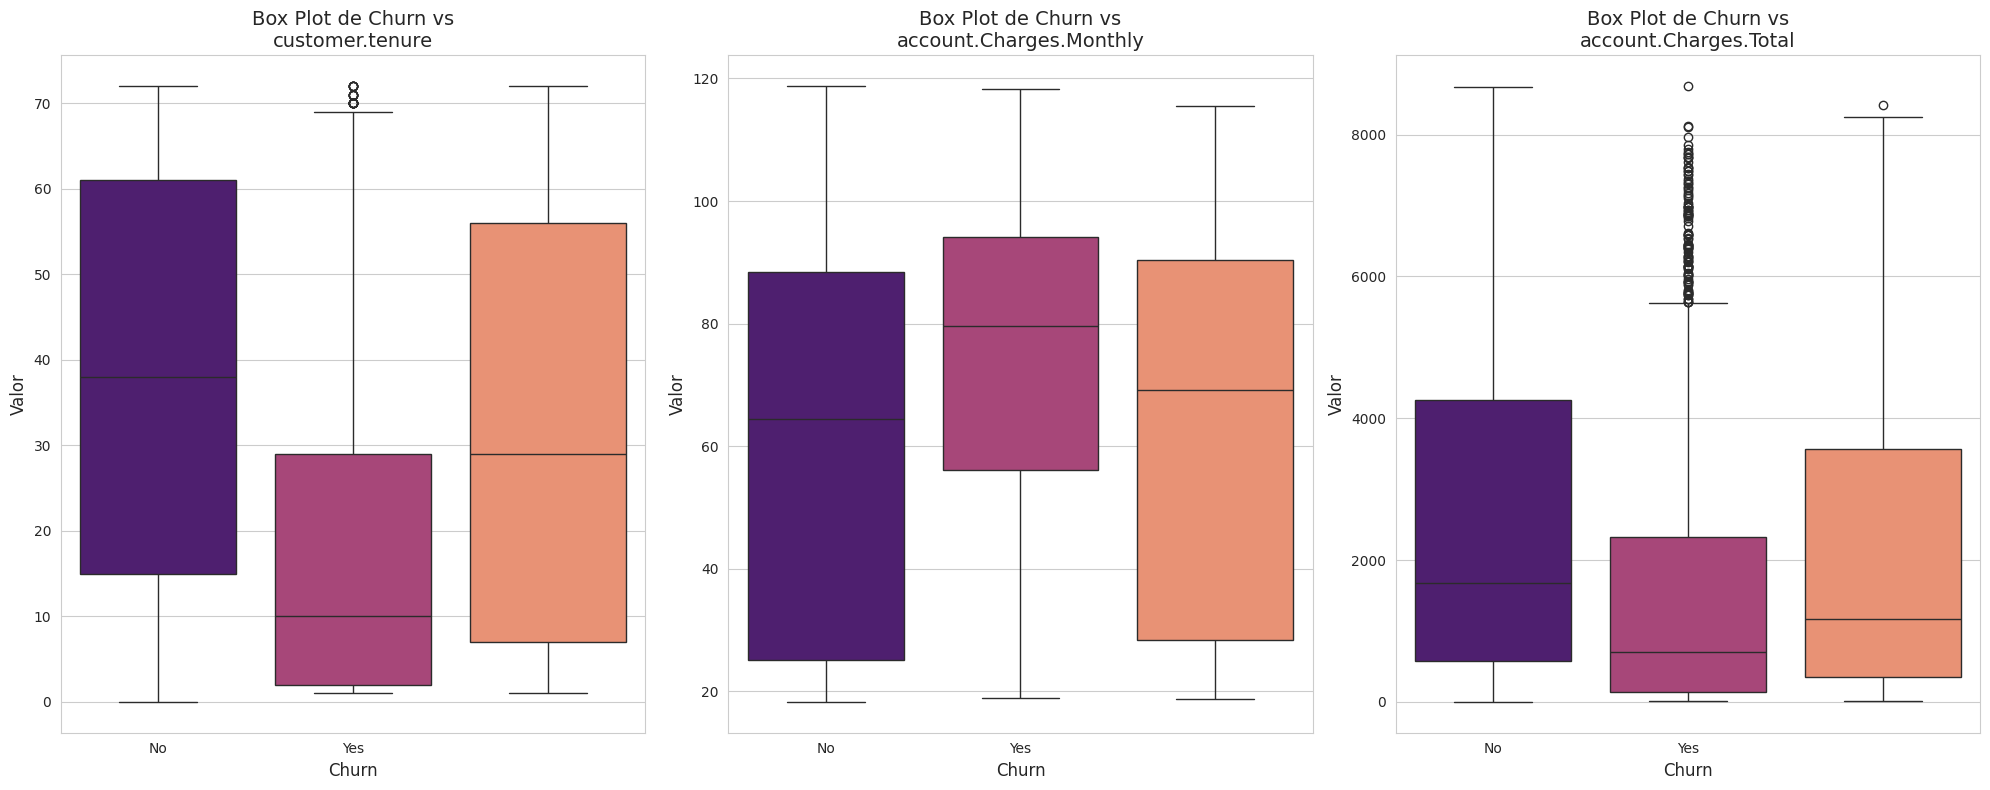

In [28]:
# ANÁLISE DE CHURN POR VARIÁVEIS NUMÉRICAS (BOX PLOT)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Lista das colunas numéricas que queremos analisar
colunas_numericas = ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']

# Criamos uma figura que abrigará nossos 3 gráficos
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))

# Loop para criar um box plot para cada coluna numérica
for i, coluna in enumerate(colunas_numericas):
    sns.boxplot(x='Churn', y=coluna, data=df, palette="magma", ax=axes[i])
    axes[i].set_title(f'Box Plot de Churn vs\n{coluna}', fontsize=14)
    axes[i].set_xlabel('Churn', fontsize=12)
    axes[i].set_ylabel('Valor', fontsize=12)

plt.tight_layout()
plt.savefig('grafico_boxplot_churn_numericas.png')
plt.show()

#📄Relatorio Final

##1. Introdução:


O presente relatório detalha o processo de Extração, Tratamento e Análise Exploratória de Dados (EDA) realizado sobre a base de clientes da empresa Telecom X.

O objetivo principal desta análise foi investigar as causas da alta taxa de evasão de clientes (churn), um problema crítico que impacta diretamente a receita e a estabilidade da empresa. Através da exploração dos dados, buscamos identificar os principais fatores e perfis de clientes associados ao cancelamento de serviços, fornecendo uma base sólida para que a equipe de Data Science possa, futuramente, desenvolver modelos preditivos e estratégias de retenção.

##2. Limpeza e Tratamento de Dados:

Para garantir a qualidade e a confiabilidade da análise, os dados brutos, extraídos de uma API em formato JSON, passaram por um rigoroso processo de limpeza e tratamento. As seguintes etapas foram executadas:

* **Extração:** Os dados foram carregados diretamente da API e convertidos para um DataFrame utilizando a biblioteca Pandas.
* **Correção de Formato:** Identificou-se que a coluna `account.Charges.Total` (cobrança total) estava formatada como texto (`object`). Ela foi convertida para um formato numérico (`float`), o que revelou valores ausentes que estavam "ocultos".
* **Tratamento de Valores Ausentes:** A análise revelou que os valores ausentes na coluna `account.Charges.Total` correspondiam exclusivamente a clientes novos (com 0 meses de contrato). A estratégia adotada foi preencher esses valores com `0`, refletindo que ainda não houve uma cobrança total consolidada.
* **Verificação de Duplicatas:** O dataset foi verificado em busca de registros duplicados, não sendo encontrado nenhum.
* **Análise de Consistência:** Todas as colunas categóricas tiveram seus valores únicos inspecionados, não sendo encontradas inconsistências como erros de digitação ou categorias redundantes.
* **Engenharia de Atributos:** Foi criada a coluna `Contas_Diarias` a partir da `account.Charges.Monthly` para permitir análises de custo sob uma nova perspectiva, embora não tenha sido o foco principal da análise visual subsequente.



##3. Análise Exploratória de Dados:

Com os dados limpos, iniciamos a análise exploratória para identificar padrões.

### 3.1. Distribuição Geral da Evasão

A primeira análise revelou a taxa de churn geral da base de dados.

*(Aqui, você inseriria o gráfico `grafico_distribuicao_churn.png`)*

- Aproximadamente **26.5%** dos clientes na base de dados cancelaram seus serviços. Este é um número significativo que justifica a preocupação da empresa.

### 3.2. Fatores Contratuais e Financeiros

A análise cruzada entre o churn e as variáveis de contrato revelou os insights mais fortes:

*(Inserir `grafico_churn_por_contrato.png` e `grafico_densidade_churn_numericas.png`)*

* **Tipo de Contrato:** Clientes com **contrato "Mês a Mês" (Month-to-month)** apresentam uma taxa de evasão drasticamente superior aos clientes com contratos de 1 ou 2 anos. A flexibilidade para cancelar se mostra um fator de risco altíssimo.
* **Tempo de Contrato (Tenure):** A evasão é muito mais concentrada em **clientes novos**. O gráfico de densidade mostrou um pico de cancelamentos nos primeiros meses de serviço, com a probabilidade de churn diminuindo significativamente à medida que o cliente permanece mais tempo na empresa.
* **Cobrança Mensal:** Clientes que cancelam tendem a ter uma **cobrança mensal mais elevada**. A faixa de $70 a $100 mensais parece ser particularmente sensível ao churn, especialmente para clientes com serviço de fibra ótica.

### 3.3. Fatores de Serviço e Pagamento

*(Inserir `grafico_churn_por_internet.png` e `grafico_churn_por_pagamento.png`)*

* **Serviço de Internet:** Clientes com serviço de **Fibra Ótica** mostraram uma taxa de churn maior que os de DSL. Isso pode ser devido a fatores como preço mais alto ou possíveis instabilidades no serviço que precisam ser investigadas.
* **Método de Pagamento:** O pagamento via **"Cheque eletrônico" (Electronic check)** está associado a uma taxa de evasão notavelmente maior em comparação com métodos automáticos, como cartão de crédito e débito em conta.

## 4. Conclusões e Insights

A análise dos dados nos permite traçar um perfil claro do cliente com maior propensão à evasão:

> **O cliente com maior risco de churn é um cliente recente (baixo tenure), com contrato do tipo "Mês a Mês", que possui serviço de Fibra Ótica e realiza o pagamento via cheque eletrônico.**

Esses fatores, combinados, criam um cenário de alto risco. A falta de um vínculo contratual de longo prazo, possivelmente associada a um serviço de maior custo (fibra), torna a decisão de cancelar mais fácil e provável.

## 5. Recomendações

Com base nos insights gerados, as seguintes ações estratégicas são recomendadas para a Telecom X:

1.  **Focar na Retenção de Clientes "Mês a Mês":**
    * **Ação:** Criar campanhas de marketing direcionadas para estes clientes, oferecendo descontos ou benefícios para a migração para um plano anual. Isso aumenta a barreira de saída e estabiliza a base de clientes.

2.  **Melhorar a Experiência nos Primeiros Meses (Onboarding):**
    * **Ação:** Implementar um programa de "Boas-Vindas" para novos clientes. Realizar um contato proativo (via telefone ou e-mail) após o primeiro mês para verificar a satisfação e tirar dúvidas. Isso pode reduzir o churn inicial, que é o mais crítico.

3.  **Incentivar Métodos de Pagamento Automáticos:**
    * **Ação:** Oferecer um pequeno desconto ou benefício para clientes que migrarem do "cheque eletrônico" para o pagamento automático (cartão de crédito ou débito em conta). Isso reduz o atrito no processo de pagamento e pode diminuir o churn involuntário (por esquecimento).

4.  **Investigar a Satisfação dos Clientes de Fibra Ótica:**
    * **Ação:** Conduzir uma pesquisa de satisfação focada neste segmento para entender se o churn elevado se deve ao preço, à estabilidade do serviço ou ao suporte técnico. A resposta direcionará as ações corretivas (revisão de preços ou melhorias técnicas).

Este relatório fornece um ponto de partida sólido para a tomada de decisões baseadas em dados, visando a redução da taxa de evasão de clientes.

##4. Conclusões e Insights

A análise dos dados nos permite traçar um perfil claro do cliente com maior propensão à evasão:

> **O cliente com maior risco de churn é um cliente recente (baixo tenure), com contrato do tipo "Mês a Mês", que possui serviço de Fibra Ótica e realiza o pagamento via cheque eletrônico.**

Esses fatores, combinados, criam um cenário de alto risco. A falta de um vínculo contratual de longo prazo, possivelmente associada a um serviço de maior custo (fibra), torna a decisão de cancelar mais fácil e provável.


##5. Recomendações:

Com base nos insights gerados, as seguintes ações estratégicas são recomendadas para a Telecom X:

1.  **Focar na Retenção de Clientes "Mês a Mês":**
    * **Ação:** Criar campanhas de marketing direcionadas para estes clientes, oferecendo descontos ou benefícios para a migração para um plano anual. Isso aumenta a barreira de saída e estabiliza a base de clientes.

2.  **Melhorar a Experiência nos Primeiros Meses (Onboarding):**
    * **Ação:** Implementar um programa de "Boas-Vindas" para novos clientes. Realizar um contato proativo (via telefone ou e-mail) após o primeiro mês para verificar a satisfação e tirar dúvidas. Isso pode reduzir o churn inicial, que é o mais crítico.

3.  **Incentivar Métodos de Pagamento Automáticos:**
    * **Ação:** Oferecer um pequeno desconto ou benefício para clientes que migrarem do "cheque eletrônico" para o pagamento automático (cartão de crédito ou débito em conta). Isso reduz o atrito no processo de pagamento e pode diminuir o churn involuntário (por esquecimento).

4.  **Investigar a Satisfação dos Clientes de Fibra Ótica:**
    * **Ação:** Conduzir uma pesquisa de satisfação focada neste segmento para entender se o churn elevado se deve ao preço, à estabilidade do serviço ou ao suporte técnico. A resposta direcionará as ações corretivas (revisão de preços ou melhorias técnicas).
